In [1]:
""" Class for drawing the 3D soccer/ football pitch."""

import warnings

from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt
import numpy as np
from matplotlib import rcParams

from mplsoccer import dimensions

In [89]:
pitch_type = 'statsbomb'
pitch_length = 105
pitch_width = 68
pad_left = 0.1
pad_right = 0.1
pad_bottom = 0.1
pad_top = 0.1
height = 0.1
half = True
dim = dimensions.create_pitch_dims(pitch_type, pitch_width, pitch_length)
extent = np.array([dim.left, dim.right, dim.bottom, dim.top], dtype=np.float32)
pad = np.array([-pad_left, pad_right, -pad_bottom, pad_top], dtype=np.float32)
if half:
    extent[0] = dim.center_length  # pitch starts at center line
if dim.invert_y:  # when inverted the padding is negative
    pad[2:] = -pad[2:]
extent = extent + pad
if half:
    extent[0] = extent[0] - min(pad_left, dim.pitch_length / 2)
    
extent[0:2] = extent[0:2][::-1]

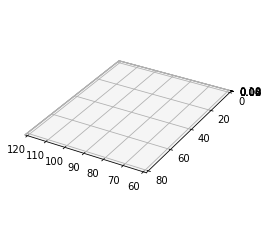

In [90]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.axes.set_xlim3d(left=extent[0], right=extent[1])
if dim.invert_y:
    ax.axes.set_ylim3d(bottom=extent[2], top=extent[3])
else:
    ax.axes.set_ylim3d(bottom=extent[3], top=extent[2])
ax.axes.set_zlim3d(bottom=0, top=height)
ax.set_box_aspect((extent[0] - extent[1], (extent[2] - extent[3]) * dim.aspect, height)) 

In [91]:
extent

array([ 1.2010000e+02,  5.9800003e+01,  8.0099998e+01, -1.0000000e-01],
      dtype=float32)

(<Figure size 432x288 with 1 Axes>, <AxesSubplot:>)

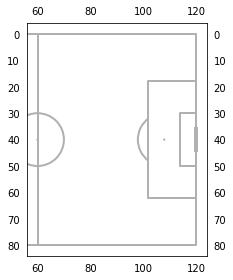

In [93]:
from mplsoccer import Pitch
pitch = Pitch(pitch_type=pitch_type, axis=True, label=True, pitch_length=pitch_length, pitch_width=pitch_width, half=half)
pitch.draw()

In [ ]:
extent[0], extent[1]
extent[2], extent[3]

In [ ]:


class BasePitch(ABC):
    """ A class for plotting soccer / football pitches in Matplotlib

    Parameters
    ----------
    pitch_type : str, default 'statsbomb'
        The pitch type used in the plot.
        The supported pitch types are: 'opta', 'statsbomb', 'tracab',
        'wyscout', 'uefa', 'metricasports', 'custom', 'skillcorner' and 'secondspectrum'.
    half : bool, default False
        Whether to display half of the pitch.
    pitch_color : any Matplotlib color, default None
        The background color for each Matplotlib axis.
         If None, defaults to rcParams["axes.facecolor"].
        To remove the background set to "None" or 'None'.
    line_color : any Matplotlib color, default None
        The line color for the pitch markings. If None, defaults to rcParams["grid.color"].
    line_alpha : float, default 1
        The transparency of the pitch and the markings.
    linewidth : float, default 2
        The line width for the pitch markings.
    linestyle : str or typle
        Linestyle for the pitch lines:
        {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
        see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
    line_zorder : float, default 0.9
        Set the zorder for the pitch lines (a matplotlib artist).
        Artists with lower zorder values are drawn first.
    spot_scale : float, default 0.002
        The size of the penalty and center spots relative to the pitch length.
    stripe : bool, default False
        Whether to show pitch stripes.
    stripe_color : any Matplotlib color, default '#c2d59d'
        The color of the pitch stripes if stripe=True
    stripe_zorder : float, default 0.6
        Set the zorder for the stripes (a matplotlib artist).
         Artists with lower zorder values are drawn first.
    pad_left, pad_right : float, default None
        Adjusts the left xlim of the axis. Positive values increase the plot area,
        while negative values decrease the plot area.
        If None set to 0.04 for 'metricasports' pitch and 4 otherwise.
    pad_bottom, pad_top : float, default None
        Adjusts the bottom ylim of the axis. Positive values increase the plot area,
        while negative values decrease the plot area.
        If None set to 0.04 for 'metricasports' pitch and 4 otherwise.
    positional : bool, default False
        Whether to draw Juego de Posición lines.
    positional_zorder : float, default 0.8
        Set the zorder for the Juego de Posición lines.
         Artists with lower zorder values are drawn first.
    positional_linewidth : float, default None
        Linewidth for the Juego de Posición lines.
        If None then this defaults to the same linewidth as the pitch lines (linewidth).
    positional_linestyle : str or tuple
        Linestyle for the Juego de Posición lines:
         {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
        see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
    positional_color : any Matplotlib color, default '#eadddd'
        The line color for the Juego de Posición lines.
    shade_middle : bool, default False
         Whether to shade the middle third of the pitch.
    shade_color : any Matplotlib color, default '#f2f2f2'
        The fill color for the shading of the middle third of the pitch.
    shade_zorder : float, default 0.7
        Set the zorder for the shading of the middle third of the pitch.
        Artists with lower zorder values are drawn first.
    pitch_length : float, default None
        The pitch length in meters. Only used for the 'tracab' and 'metricasports',
        'skillcorner', 'secondspectrum' and 'custom' pitch_type.
    pitch_width : float, default None
        The pitch width in meters. Only used for the 'tracab' and 'metricasports',
        'skillcorner', 'secondspectrum' and 'custom' pitch_type
    goal_type : str, default 'line'
        Whether to display the goals as a 'line', 'box', 'circle' or to not display it at all (None)
    goal_alpha : float, default 1
        The transparency of the goal.
    goal_linestyle : str or typle
        Linestyle for the pitch lines:
        {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
        see: https://matplotlib.org/stable/gallery/lines_bars_and_markers/linestyles.html
    axis : bool, default False
        Whether to set the axis spines to visible.
    label : bool, default False
        Whether to include the axis labels.
    tick : bool, default False
        Whether to include the axis ticks.
    corner_arcs : bool, default False
        Whether to include corner arcs.
    """

    def __init__(self, pitch_type='statsbomb', half=False,
                 pitch_color=None, line_color=None, line_alpha=1, linewidth=2,
                 linestyle=None, line_zorder=0.9, spot_scale=0.002,
                 stripe=False, stripe_color='#c2d59d', stripe_zorder=0.6,
                 pad_left=None, pad_right=None, pad_bottom=None, pad_top=None,
                 positional=False, positional_zorder=0.8, positional_linewidth=None,
                 positional_linestyle=None, positional_color='#eadddd',
                 shade_middle=False, shade_color='#f2f2f2', shade_zorder=0.7,
                 pitch_length=None, pitch_width=None,
                 goal_type='line', goal_alpha=1, goal_linestyle=None,
                 axis=False, label=False, tick=False, corner_arcs=False):

        # initialize attributes
        self.pitch_type = pitch_type
        self.half = half
        self.pitch_color = pitch_color
        if self.pitch_color is None:
            self.pitch_color = rcParams['axes.facecolor']
        self.line_color = line_color
        if self.line_color is None:
            self.line_color = rcParams["grid.color"]
        self.linewidth = linewidth
        self.linestyle = linestyle
        self.spot_scale = spot_scale
        self.line_zorder = line_zorder
        self.stripe = stripe
        self.stripe_color = stripe_color
        self.stripe_zorder = stripe_zorder
        self.pad_left = pad_left
        self.pad_right = pad_right
        self.pad_bottom = pad_bottom
        self.pad_top = pad_top
        self.positional = positional
        self.positional_zorder = positional_zorder
        self.positional_linewidth = positional_linewidth
        if self.positional_linewidth is None:
            self.positional_linewidth = linewidth
        self.positional_linestyle = positional_linestyle
        self.positional_color = positional_color
        self.shade_middle = shade_middle
        self.shade_color = shade_color
        self.shade_zorder = shade_zorder
        self.pitch_length = pitch_length
        self.pitch_width = pitch_width
        self.goal_type = goal_type
        self.goal_alpha = goal_alpha
        self.goal_linestyle = goal_linestyle
        self.line_alpha = line_alpha
        self.axis = axis
        self.label = label
        self.tick = tick
        self.corner_arcs = corner_arcs

        # other attributes for plotting circles - completed by
        # _init_circles_and_arcs / _init_circles_and_arcs_equal_aspect
        self.diameter1 = None
        self.diameter2 = None
        self.diameter_spot1 = None
        self.diameter_spot2 = None
        self.diameter_corner1 = None
        self.diameter_corner2 = None
        self.arc1_theta1 = None
        self.arc1_theta2 = None
        self.arc2_theta1 = None
        self.arc2_theta2 = None

        # the other attributes - completed by
        # set_extent in Pitch and VerticalPitch (inherit from BasePitch)
        self.extent = None
        self.visible_pitch = None
        self.ax_aspect = None
        self.kde_clip = None
        self.hexbin_gridsize = None
        self.hex_extent = None
        self.vertical = None
        self.reverse_cmap = None

        # data checks
        self._validation_checks()

        self.standardizer = Standardizer(pitch_from=pitch_type, width_from=pitch_width,
                                         length_from=pitch_length, pitch_to='uefa')
        # set pitch dimensions
        self.dim = dimensions.create_pitch_dims(pitch_type, pitch_width, pitch_length)

        # if the padding is None set it to 4 on all sides, or 0.04 in the case of metricasports
        # for tracab multiply the padding by 100
        for pad in ['pad_left', 'pad_right', 'pad_bottom', 'pad_top']:
            if getattr(self, pad) is None:
                if pitch_type != 'metricasports':
                    setattr(self, pad, 4)
                else:
                    setattr(self, pad, 0.04)
            if pitch_type == 'tracab':
                setattr(self, pad, getattr(self, pad) * 100)

        # scale the padding where the aspect is not equal to one
        # this means that you can easily set the padding the same
        # all around the pitch (e.g. when using an Opta pitch)
        if self.dim.aspect != 1:
            self._scale_pad()

        # set the extent (takes into account padding)
        # [xleft, xright, ybottom, ytop] and the aspect ratio of the axis
        # also sets some attributes used for plotting hexbin/ arrows/ lines/ kdeplot/ stripes
        self._set_extent()

        # validate the padding
        self._validate_pad()

        # calculate locations of arcs and circles.
        # Where the pitch has an unequal aspect ratio we need to do this seperately
        if (self.dim.aspect == 1) and (self.pitch_type != 'metricasports'):
            self._init_circles_and_arcs()

        # set the positions of the goal posts
        self.goal_left = np.array([[self.dim.left, self.dim.goal_bottom],
                                   [self.dim.left, self.dim.goal_top]])
        self.goal_right = np.array([[self.dim.right, self.dim.goal_bottom],
                                    [self.dim.right, self.dim.goal_top]])

    def __repr__(self):
        return (f'{self.__class__.__name__}('
                f'pitch_type={self.pitch_type!r}, half={self.half!r}, '
                f'pitch_color={self.pitch_color!r}, line_color={self.line_color!r}, '
                f'linewidth={self.linewidth!r}, line_zorder={self.line_zorder!r}, '
                f'linestyle={self.linestyle!r}, '
                f'stripe={self.stripe!r}, stripe_color={self.stripe_color!r}, '
                f'stripe_zorder={self.stripe_zorder!r}, '
                f'pad_left={self.pad_left!r}, pad_right={self.pad_right!r}, '
                f'pad_bottom={self.pad_bottom!r}, pad_top={self.pad_top!r}, '
                f'positional={self.positional!r}, positional_zorder={self.positional_zorder!r}, '
                f'positional_linewidth={self.positional_linewidth!r}, '
                f'positional_linestyle={self.positional_linestyle!r}, '
                f'positional_color={self.positional_color!r}, shade_middle={self.shade_middle!r}, '
                f'shade_color={self.shade_color!r}, shade_zorder={self.shade_zorder!r}, '
                f'pitch_length={self.pitch_length!r}, pitch_width={self.pitch_width!r}, '
                f'goal_type={self.goal_type!r}, goal_alpha={self.goal_alpha!r}, '
                f'line_alpha={self.line_alpha!r}, label={self.label!r}, '
                f'tick={self.tick!r}, axis={self.axis!r}, spot_scale={self.spot_scale!r}, '
                f'corner_arcs={self.corner_arcs!r})'
                )

    def _validation_checks(self):
        # pitch validation
        if self.pitch_type not in dimensions.valid:
            raise TypeError(f'Invalid argument: pitch_type should be in {dimensions.valid}')
        if (self.pitch_length is None or self.pitch_width is None) \
                and self.pitch_type in dimensions.size_varies:
            raise TypeError("Invalid argument: pitch_length and pitch_width must be specified.")
        if ((self.pitch_type not in dimensions.size_varies) and
                ((self.pitch_length is not None) or (self.pitch_width is not None))):
            msg = f"Pitch length and widths are only used for {dimensions.size_varies}" \
                  f" pitches and will be ignored"
            warnings.warn(msg)

        # type checks
        for attribute in ['axis', 'stripe', 'tick', 'label', 'shade_middle',
                          'half', 'positional']:
            if not isinstance(getattr(self, attribute), bool):
                raise TypeError(f"Invalid argument: '{attribute}' should be bool.")
        valid_goal_type = ['line', 'box', 'circle']
        if self.goal_type not in valid_goal_type:
            raise TypeError(f'Invalid argument: goal_type should be in {valid_goal_type}')

        # axis/ label warnings
        if (self.axis is False) and self.label:
            warnings.warn("Labels will not be shown unless axis=True")
        if (self.axis is False) and self.tick:
            warnings.warn("Ticks will not be shown unless axis=True")

    def _validate_pad(self):
        # make sure padding not too large for the pitch
        if abs(min(self.pad_left, 0) + min(self.pad_right, 0)) >= self.dim.length:
            raise ValueError("pad_left/pad_right too negative for pitch length")
        if abs(min(self.pad_top, 0) + min(self.pad_bottom, 0)) >= self.dim.width:
            raise ValueError("pad_top/pad_bottom too negative for pitch width")
        if self.half:
            if abs(min(self.pad_left, 0) + min(self.pad_right, 0)) >= self.dim.length / 2:
                raise ValueError("pad_left/pad_right too negative for pitch length")

    def _init_circles_and_arcs(self):
        self.diameter1 = self.dim.circle_diameter
        self.diameter2 = self.dim.circle_diameter
        self.diameter_spot1 = self.spot_scale * self.dim.length * 2
        self.diameter_spot2 = self.spot_scale * self.dim.length * 2
        self.diameter_corner1 = self.dim.corner_diameter
        self.diameter_corner2 = self.dim.corner_diameter
        self.arc1_theta1 = -self.dim.arc
        self.arc1_theta2 = self.dim.arc
        self.arc2_theta1 = 180 - self.dim.arc
        self.arc2_theta2 = 180 + self.dim.arc

    def _diameter_circle_equal_aspect(self, x, y, ax, radius):
        # coordinates of center/ perimeter
        center = (x, y)
        circle_perimeter_length = (x + radius * self.dim.length / self.dim.pitch_length, y)
        circle_perimeter_width = (x, y + radius * self.dim.width / self.dim.pitch_width)
        # to ax coordinates
        center = self._to_ax_coord(ax, ax.transAxes, center)
        circle_perimeter_length = self._to_ax_coord(ax, ax.transAxes, circle_perimeter_length)
        circle_perimeter_width = self._to_ax_coord(ax, ax.transAxes, circle_perimeter_width)
        # calculate diameter
        diameter1 = (circle_perimeter_length[0] - center[0]) * 2
        diameter2 = (circle_perimeter_width[1] - center[1]) * 2
        return diameter1, diameter2

    def _arc_angles_equal_aspect(self, ax, radius):
        # calculate the point that the arc intersects the penalty area
        radius_length = radius * self.dim.length / self.dim.pitch_length
        radius_width = radius * self.dim.width / self.dim.pitch_width
        intersection = self.dim.center_width - ((radius_width * radius_length *
                                                 (radius_length ** 2 -
                                                  (self.dim.penalty_area_length -
                                                   self.dim.penalty_left) ** 2) ** 0.5) /
                                                radius_length ** 2)
        arc_pen_top1 = (self.dim.penalty_area_length, intersection)
        spot_xy = (self.dim.penalty_left, self.dim.center_width)
        # to ax coordinates
        arc_pen_top1 = self._to_ax_coord(ax, ax.transAxes, arc_pen_top1)
        spot_xy = self._to_ax_coord(ax, ax.transAxes, spot_xy)
        # work out the arc angles
        adjacent = arc_pen_top1[0] - spot_xy[0]
        opposite = spot_xy[1] - arc_pen_top1[1]
        self.arc1_theta2 = np.degrees(np.arctan(opposite / adjacent))
        self.arc1_theta1 = 360 - self.arc1_theta2
        self.arc2_theta1 = 180 - self.arc1_theta2
        self.arc2_theta2 = 180 + self.arc1_theta2

    def _init_circles_and_arcs_equal_aspect(self, ax):
        radius_center = self.dim.circle_diameter / 2
        radius_corner = self.dim.corner_diameter / 2
        radius_spot = self.spot_scale * self.dim.pitch_length

        (self.diameter1,
         self.diameter2) = self._diameter_circle_equal_aspect(self.dim.center_length,
                                                              self.dim.center_width,
                                                              ax, radius_center)
        (self.diameter_spot1,
         self.diameter_spot2) = self._diameter_circle_equal_aspect(self.dim.penalty_left,
                                                                   self.dim.center_width,
                                                                   ax, radius_spot)

        (self.diameter_corner1,
         self.diameter_corner2) = self._diameter_circle_equal_aspect(self.dim.left,
                                                                     self.dim.bottom,
                                                                     ax, radius_corner)

        self._arc_angles_equal_aspect(ax, radius_center)

    @staticmethod
    def _to_ax_coord(ax, coord_system, point):
        return coord_system.inverted().transform(ax.transData.transform_point(point))

    def draw(self, ax=None, figsize=None, nrows=1, ncols=1,
             tight_layout=True, constrained_layout=False):
        """ Draws the specified soccer/ football pitch(es).
        If an ax is specified the pitch is drawn on an existing axis.

        Parameters
        ----------
        ax : matplotlib axis, default None
            A matplotlib.axes.Axes to draw the pitch on.
            If None is specified the pitch is plotted on a new figure.
        figsize : tuple of float, default Matplotlib figure size
            The figure size in inches by default uses rcParams["figure.figsize"].
        nrows, ncols : int, default 1
            Number of rows/columns of the subplot grid.
        tight_layout : bool, default True
            Whether to use Matplotlib's tight layout.
        constrained_layout : bool, default False
            Whether to use Matplotlib's constrained layout.

        Returns
        -------
        If ax=None returns a matplotlib Figure and Axes.
        Else plotted on an existing axis and returns None.

        Examples
        --------
        >>> from mplsoccer import Pitch
        >>> pitch = Pitch()
        >>> fig, ax = pitch.draw()

        >>> from mplsoccer import Pitch
        >>> import matplotlib.pyplot as plt
        >>> fig, ax = plt.subplots()
        >>> pitch = Pitch()
        >>> pitch.draw(ax=ax)
        """
        if constrained_layout and tight_layout:
            msg = ('You have set constrained_layout==True and tight_layout==True,'
                   ' set one to False as they are incompatible.')
            warnings.warn(msg)

        if figsize is None:
            figsize = rcParams['figure.figsize']
        if ax is None:
            fig, axs = self._setup_subplots(nrows, ncols, figsize, constrained_layout)
            fig.set_tight_layout(tight_layout)
            for axis in axs.flat:
                self._draw_ax(axis)
            if axs.size == 1:
                axs = axs.item()
            return fig, axs

        self._draw_ax(ax)
        return None

    @staticmethod
    def _setup_subplots(nrows, ncols, figsize, constrained_layout):
        fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=figsize,
                                constrained_layout=constrained_layout)
        if (nrows == 1) and (ncols == 1):
            axs = np.array([axs])
        return fig, axs

    def _draw_ax(self, ax):
        if self.arc1_theta1 is None:
            self._init_circles_and_arcs_equal_aspect(ax)
        self._set_axes(ax)
        self._set_background(ax)
        self._draw_pitch_markings(ax)
        self._draw_goals(ax)
        if self.positional:
            self._draw_juego_de_posicion(ax)
        if self.shade_middle:
            self._draw_shade_middle(ax)

    def _set_axes(self, ax):
        # set axis on/off, labels, grid, and ticks
        set_visible(ax, spine_bottom=self.axis, spine_top=self.axis, spine_left=self.axis,
                    spine_right=self.axis, grid=False, tick=self.tick, label=self.label)
        # set limits and aspect
        ax.set_xlim(self.extent[0], self.extent[1])
        ax.set_ylim(self.extent[2], self.extent[3])
        ax.set_aspect(self.dim.aspect)

    def _set_background(self, ax):
        if self.pitch_color != 'grass':
            ax.set_facecolor(self.pitch_color)
            if self.stripe:
                self._plain_stripes(ax)
        else:
            pitch_color = np.random.normal(size=(1000, 1000))
            if self.stripe:
                pitch_color = self._draw_stripe_grass(pitch_color)
            ax.imshow(pitch_color, cmap=grass_cmap(), extent=self.extent, aspect=self.dim.aspect)

    def _plain_stripes(self, ax):
        for i in range(len(self.dim.stripe_locations) - 1):
            if i % 2 == 0:
                self._draw_stripe(ax, i)

    def _draw_pitch_markings(self, ax):
        # if we use rectangles here then the linestyle isn't consistent around the pitch
        # as sometimes the rectangles overlap with each other and the gaps between
        # lines can when they overlap can look like a solid line even with -. linestyles.
        line_prop = {'linewidth': self.linewidth, 'alpha': self.line_alpha,
                     'color': self.line_color, 'zorder': self.line_zorder,
                     'linestyle': self.linestyle,
                     }
        # main markings (outside of pitch and center line)
        xs_main = [self.dim.center_length, self.dim.center_length, self.dim.right,
                   self.dim.right, self.dim.left, self.dim.left, self.dim.center_length,
                   ]
        ys_main = [self.dim.bottom, self.dim.top, self.dim.top,
                   self.dim.bottom, self.dim.bottom, self.dim.top, self.dim.top,
                   ]
        self._draw_line(ax, xs_main, ys_main, **line_prop)
        # penalty boxs
        xs_pbox_right = [self.dim.right, self.dim.penalty_area_right,
                         self.dim.penalty_area_right, self.dim.right,
                         ]
        xs_pbox_left = [self.dim.left, self.dim.penalty_area_left,
                        self.dim.penalty_area_left, self.dim.left,
                        ]
        ys_pbox = [self.dim.penalty_area_bottom, self.dim.penalty_area_bottom,
                   self.dim.penalty_area_top, self.dim.penalty_area_top,
                   ]
        self._draw_line(ax, xs_pbox_right, ys_pbox, **line_prop)
        self._draw_line(ax, xs_pbox_left, ys_pbox, **line_prop)
        # six-yard box
        xs_sixbox_right = [self.dim.right, self.dim.six_yard_right,
                           self.dim.six_yard_right, self.dim.right,
                           ]
        xs_sixbox_left = [self.dim.left, self.dim.six_yard_left,
                          self.dim.six_yard_left, self.dim.left,
                          ]
        ys_sixbox = [self.dim.six_yard_bottom, self.dim.six_yard_bottom,
                     self.dim.six_yard_top, self.dim.six_yard_top,
                     ]
        self._draw_line(ax, xs_sixbox_right, ys_sixbox, **line_prop)
        self._draw_line(ax, xs_sixbox_left, ys_sixbox, **line_prop)
        self._draw_circles_and_arcs(ax)

    def _draw_circles_and_arcs(self, ax):
        circ_prop = {'fill': False, 'linewidth': self.linewidth, 'alpha': self.line_alpha,
                     'color': self.line_color, 'zorder': self.line_zorder,
                     'linestyle': self.linestyle,
                     }

        # draw center circle and penalty area arcs
        self._draw_ellipse(ax, self.dim.center_length, self.dim.center_width,
                           self.diameter1, self.diameter2, **circ_prop)
        self._draw_arc(ax, self.dim.penalty_left, self.dim.center_width,
                       self.diameter1, self.diameter2,
                       theta1=self.arc1_theta1, theta2=self.arc1_theta2, **circ_prop)
        self._draw_arc(ax, self.dim.penalty_right, self.dim.center_width,
                       self.diameter1, self.diameter2,
                       theta1=self.arc2_theta1, theta2=self.arc2_theta2, **circ_prop)

        if self.corner_arcs:
            if self.dim.invert_y:
                thetas = [(0, 90), (90, 180), (180, 270), (270, 360)]
            else:
                thetas = [(270, 360), (180, 270), (90, 180), (0, 90)]
            if self.vertical:
                thetas = np.flip(thetas, axis=0)
            corner_points = [(self.dim.left, self.dim.top),
                             (self.dim.right, self.dim.top),
                             (self.dim.right, self.dim.bottom),
                             (self.dim.left, self.dim.bottom)]
            for i, (x, y) in enumerate(corner_points):
                t1, t2 = thetas[i]
                self._draw_arc(ax, x, y, self.diameter_corner1, self.diameter_corner2,
                               theta1=t1, theta2=t2, **circ_prop)

        # draw center and penalty spots
        if self.spot_scale > 0:
            self._draw_ellipse(ax, self.dim.center_length, self.dim.center_width,
                               self.diameter_spot1, self.diameter_spot2,
                               alpha=self.line_alpha, color=self.line_color,
                               zorder=self.line_zorder)
            self._draw_ellipse(ax, self.dim.penalty_left, self.dim.center_width,
                               self.diameter_spot1, self.diameter_spot2,
                               alpha=self.line_alpha, color=self.line_color,
                               zorder=self.line_zorder)
            self._draw_ellipse(ax, self.dim.penalty_right, self.dim.center_width,
                               self.diameter_spot1, self.diameter_spot2,
                               alpha=self.line_alpha, color=self.line_color,
                               zorder=self.line_zorder)

    def _draw_goals(self, ax):
        if self.goal_type == 'box':
            line_prop = {'linewidth': self.linewidth, 'color': self.line_color,
                         'alpha': self.goal_alpha, 'zorder': self.line_zorder,
                         'linestyle': self.goal_linestyle,
                         }
            # left goal
            xs_left = [self.dim.left, self.dim.left - self.dim.goal_length,
                       self.dim.left - self.dim.goal_length, self.dim.left,
                       ]
            ys_left = [self.dim.goal_bottom, self.dim.goal_bottom,
                       self.dim.goal_top, self.dim.goal_top,
                       ]

            self._draw_line(ax, xs_left, ys_left, **line_prop)
            # right goal
            xs_right = [self.dim.right, self.dim.right + self.dim.goal_length,
                        self.dim.right + self.dim.goal_length, self.dim.right,
                        ]
            ys_right = [self.dim.goal_bottom, self.dim.goal_bottom,
                        self.dim.goal_top, self.dim.goal_top,
                        ]
            self._draw_line(ax, xs_right, ys_right, **line_prop)

        elif self.goal_type == 'line':
            line_prop = {'linewidth': self.linewidth * 2, 'color': self.line_color,
                         'alpha': self.goal_alpha, 'zorder': self.line_zorder,
                         'linestyle': self.goal_linestyle,
                         }
            self._draw_line(ax, [self.dim.right, self.dim.right],
                            [self.dim.goal_top, self.dim.goal_bottom], **line_prop)
            self._draw_line(ax, [self.dim.left, self.dim.left],
                            [self.dim.goal_top, self.dim.goal_bottom], **line_prop)

        elif self.goal_type == 'circle':
            posts = [[self.dim.right, self.dim.goal_bottom], [self.dim.right, self.dim.goal_top],
                     [self.dim.left, self.dim.goal_bottom], [self.dim.left, self.dim.goal_top]]
            for post in posts:
                self._draw_ellipse(ax, post[0], post[1], self.diameter_spot1, self.diameter_spot2,
                                   alpha=self.goal_alpha, color=self.line_color,
                                   zorder=self.line_zorder)

    def _draw_juego_de_posicion(self, ax):
        line_prop = {'linewidth': self.positional_linewidth, 'color': self.positional_color,
                     'alpha': self.line_alpha, 'linestyle': self.positional_linestyle,
                     'zorder': self.positional_zorder}
        # x lines for Juego de Posición
        for coord in self.dim.positional_x[1:-1]:
            self._draw_line(ax, [coord, coord], [self.dim.bottom, self.dim.top], **line_prop)
        # y lines for Juego de Posición
        self._draw_line(ax, [self.dim.left, self.dim.right],
                        [self.dim.positional_y[1], self.dim.positional_y[1]], **line_prop)
        self._draw_line(ax, [self.dim.penalty_area_left, self.dim.penalty_area_right],
                        [self.dim.positional_y[2], self.dim.positional_y[2]], **line_prop)
        self._draw_line(ax, [self.dim.penalty_area_left, self.dim.penalty_area_right],
                        [self.dim.positional_y[3], self.dim.positional_y[3]], **line_prop)
        self._draw_line(ax, [self.dim.left, self.dim.right],
                        [self.dim.positional_y[4], self.dim.positional_y[4]], **line_prop)

    def _draw_shade_middle(self, ax):
        shade_prop = {'fill': True, 'facecolor': self.shade_color,
                      'alpha': self.line_alpha, 'zorder': self.shade_zorder}
        self._draw_rectangle(ax, self.dim.positional_x[2], self.dim.bottom,
                             self.dim.positional_x[4] - self.dim.positional_x[2], self.dim.width,
                             **shade_prop)

    def grid(self, figheight=9, nrows=1, ncols=1, grid_height=0.715, grid_width=0.95, space=0.05,
             left=None, bottom=None, endnote_height=0.065, endnote_space=0.01,
             title_height=0.15, title_space=0.01, axis=True):
        """ A helper to create a grid of pitches in a specified location

        Parameters
        ----------
        figheight : float, default 9
            The figure height in inches.
        nrows, ncols : int, default 1
            Number of rows/columns of pitches in the grid.
        grid_height : float, default 0.715
            The height of the pitch grid in fractions of the figure height.
            The default is the grid height is 71.5% of the figure height.
        grid_width : float, default 0.95
            The width of the pitch grid in fractions of the figure width.
            The default is the grid is 95% of the figure width.
        space : float, default 0.05
            The total amount of the grid height reserved for spacing between the pitch axes.
            Expressed as a fraction of the grid_height. The default is 5% of the grid height.
            The spacing across the grid width is automatically calculated to maintain even spacing.
        left : float, default None
            The location of the left-hand side of the axes in fractions of the figure width.
            The default of None places the axes in the middle of the figure.
        bottom : float, default None
            The location of the bottom endnote axes in fractions of the figure height.
            The default of None places the axes in the middle of the figure.
            If the endnote_height=0 then the pitch grid is located at the bottom coordinate instead.
        endnote_height: float, default 0.065
            The height of the endnote axes in fractions of the figure height.
            The default is the endnote is 6.5% of the figure height.
            If endnote_height=0, then the endnote axes is not plotted.
        endnote_space : float, default 0.01
            The space between the pitch grid and endnote axis in fractions of the figure height.
            The default space is 1% of the figure height.
            If endnote_height=0, then the endnote_space is set to zero.
        title_height : float, default 0.15
            The height of the title axis in fractions of the figure height.
            The default is the title axis is 15% of the figure height.
            If title_height=0, then the title axes is not plotted.
        title_space : float, default 0.01
            The space between the pitch grid and title axis in fractions of the figure height.
            The default space is 1% of the figure height.
            If title_height=0, then the title_space is set to zero.
        axis : bool, default True
            Whether the endnote and title axes are 'on'.

        Returns
        -------
        fig : matplotlib.figure.Figure
        axs : dict[label, Axes]
            A dictionary mapping the labels to the Axes objects.
            The possible keys are 'pitch', 'title', and 'endnote'.

        Examples
        --------
        >>> from mplsoccer import Pitch
        >>> pitch = Pitch()
        >>> fig, axs = pitch.grid(nrows=3, ncols=3, grid_height=0.7, figheight=14)
        """
        dim = _grid_dimensions(ax_aspect=self.ax_aspect, figheight=figheight, nrows=nrows,
                               ncols=ncols, grid_height=grid_height, grid_width=grid_width,
                               space=space, left=left, bottom=bottom,
                               endnote_height=endnote_height, endnote_space=endnote_space,
                               title_height=title_height, title_space=title_space)
        left_pad = (np.abs(self.visible_pitch - self.extent)[0] /
                    np.abs(self.extent[1] - self.extent[0])) * dim['axwidth']
        right_pad = (np.abs(self.visible_pitch - self.extent)[1] /
                     np.abs(self.extent[1] - self.extent[0])) * dim['axwidth']
        fig, axs = _draw_grid(dimensions=dim, left_pad=left_pad, right_pad=right_pad,
                              axis=axis, grid_key='pitch')

        if endnote_height > 0 or title_height > 0:
            for ax in np.asarray(axs['pitch']).flat:
                self.draw(ax=ax)
        else:
            for ax in np.asarray(axs).flat:
                self.draw(ax=ax)

        return fig, axs

    def grid_dimensions(self, figwidth, figheight, nrows, ncols, max_grid, space):
        """ A helper method to propose a grid_width and grid_height for grid based on the inputs.

        Parameters
        ----------
        figwidth, figheight : float
            The figure width/height in inches.
        nrows, ncols : int
            Number of rows/columns of pitches in the grid.
        max_grid : float
            The longest side of the grid in fractions of the figure width / height.
            Should be between zero and one.
        space : float
            The total amount of the grid height reserved for spacing between the pitch axes.
            Expressed as a fraction of the grid_height.

        Returns
        -------
        grid_width, grid_height : the suggested grid_width and grid_height

        Examples
        --------
        >>> from mplsoccer import Pitch
        >>> pitch = Pitch()
        >>> grid_width, grid_height = pitch.grid_dimensions(figwidth=16, figheight=9, \
                                                            nrows=1, ncols=1, \
                                                            max_grid=1,  space=0)
        """
        grid_width, grid_height = grid_dimensions(self.ax_aspect, figwidth=figwidth,
                                                  figheight=figheight,
                                                  nrows=nrows, ncols=ncols,
                                                  max_grid=max_grid, space=space)
        return grid_width, grid_height

    def jointgrid(self, figheight=9, left=None, grid_width=0.95,
                  bottom=None, endnote_height=0.065, endnote_space=0.01,
                  grid_height=0.715, title_space=0.01, title_height=0.15,
                  space=0, marginal=0.1,
                  ax_left=True, ax_top=True, ax_right=True, ax_bottom=False,
                  axis=True):
        """ Create a grid with a pitch at the center and (marginal) axes at the sides of the pitch.

        Parameters
        ----------
        figheight : float, default 9
            The figure height in inches.
        left : float, default None
            The location of the left-hand side of the grid in fractions of the figure width.
            The default of None places the axes in the middle of the figure.
        grid_width : float, default 0.95
            The width of the grid area in fractions of the figure width.
            The default is the grid is 80% of the figure width.
        bottom : float, default None
            The location of the bottom endnote axes in fractions of the figure height.
            The default of None places the axes in the middle of the figure.
            If the endnote_height=0 then the joint grid is located at the bottom coordinate instead.
        endnote_height: float, default 0.065
            The height of the endnote axes in fractions of the figure height.
            The default is the endnote is 6.5% of the figure height.
            If endnote_height=0, then the endnote axes is not plotted.
        endnote_space : float, default 0.01
            The space between the joint grid and endnote axis in fractions of the figure height.
            The default space is 1% of the figure height.
            If endnote_height=0, then the endnote_space is set to zero.
        grid_height : float, default 0.715
            The height of the joint grid area in fractions of the figure height.
            The default is the grid height is 70% of the figure height.
        title_space : float, default 0.01
            The space between the joint grid and title axis in fractions of the figure height.
            The default space is 1% of the figure height.
            If title_height=0, then the title_space is set to zero.
        title_height : float, default 0.15
            The height of the title axis in fractions of the figure height.
            The default is the title axis is 15% of the figure height.
            If title_height=0, then the title axes is not plotted.
        space : float, default 0.01
            The total amount of the grid height reserved for spacing between axes.
            Expressed as a fraction of the grid height. The default is 0.01% of the grid height.
            Note if space is zero, it will still look like there is space
            if the pitch has padding, e.g. pad_top=15.
        marginal : float, default 0.1
            The total amount of the grid height reserved for the marginal axes.
            Expressed as a fraction of the grid height. The default is 10% of the grid height.
        ax_left, ax_top, ax_right : bool, default True
            Whether to include a Matplotlib Axes on the left/top/right side of the pitch.
        ax_bottom : bool, default False
            Whether to include a Matplotlib Axes on the bottom side of the pitch.
        axis : bool, default True
            Whether the endnote, title, and the marginal axes are 'on'.

        Returns
        -------
        fig : matplotlib.figure.Figure
        axs : dict[label, Axes]
            A dictionary mapping the labels to the Axes objects.
            The possible keys are 'left', 'right', 'bottom', 'top' for the marginal axes,
            'pitch', 'title' and 'endnote'.

        Examples
        --------
        >>> from mplsoccer import Pitch
        >>> import numpy as np
        >>> import seaborn as sns
        >>> pitch = Pitch()
        >>> fig, axs = pitch.jointgrid(ax_left=False, ax_right=False, \
                                       ax_bottom=False, ax_top=True)
        >>> x = np.random.uniform(low=0, high=120, size=100)
        >>> sns.kdeplot(x=x, ax=axs['top'], shade=True)
        """
        if left is None:
            left = (1 - grid_width) / 2

        if title_height == 0:
            title_space = 0

        if endnote_height == 0:
            endnote_space = 0

        error_msg_height = ('The axes extends past the figure height. '
                            'Reduce one of the bottom, endnote_height, endnote_space, grid_height, '
                            'title_space or title_height so the total is ≤ 1.')
        error_msg_width = ('The grid axes extends past the figure width. '
                           'Reduce one of the grid_width or left so the total is ≤ 1.')

        axes_height = endnote_height + endnote_space + grid_height + title_space + title_height
        if axes_height > 1:
            raise ValueError(error_msg_height)

        if bottom is None:
            bottom = (1 - axes_height) / 2

        if bottom + axes_height > 1:
            raise ValueError(error_msg_height)

        if grid_width + left > 1:
            raise ValueError(error_msg_width)

        # calculate the marginal and space heights for the bottom/ top of the grid
        space_height = space * grid_height
        marginal_height = marginal * grid_height
        space_top = 0
        marginal_top = 0
        space_bottom = 0
        marginal_bottom = 0
        if ax_top:
            space_top = space_height
            marginal_top = marginal_height
        if ax_bottom:
            space_bottom = space_height
            marginal_bottom = marginal_height

        # calculate the figwidth
        pitch_height = grid_height - space_top - space_bottom - marginal_top - marginal_bottom
        figwidth = (figheight / grid_width *
                    (ax_left * marginal_height + ax_right * marginal_height +
                     pitch_height * self.ax_aspect +
                     ax_left * space_height + ax_right * space_height))

        # calculate the total pitch, marginal and space width
        fig_aspect = figwidth / figheight
        pitch_width = pitch_height * self.ax_aspect / fig_aspect
        marginal_width = marginal_height / fig_aspect
        space_width = space_height / fig_aspect

        # calculate the marginal and space widths for the left/ right of the grid
        space_left = 0
        marginal_left = 0
        space_right = 0
        marginal_right = 0
        if ax_left:
            space_left = space_width
            marginal_left = marginal_width
        if ax_right:
            space_right = space_width
            marginal_right = marginal_width

        # calculate the padding either side of the pitch (so the axes line up with the sides)
        left_pad = (np.abs(self.visible_pitch - self.extent)[0] /
                    np.abs(self.extent[1] - self.extent[0])) * pitch_width
        right_pad = (np.abs(self.visible_pitch - self.extent)[1] /
                     np.abs(self.extent[1] - self.extent[0])) * pitch_width
        bottom_pad = (np.abs(self.visible_pitch - self.extent)[2] /
                      np.abs(self.extent[3] - self.extent[2])) * pitch_height
        top_pad = (np.abs(self.visible_pitch - self.extent)[3] /
                   np.abs(self.extent[3] - self.extent[2])) * pitch_height

        # axes limits
        x0, x1, y0, y1 = self.visible_pitch

        # create the figure
        fig = plt.figure(figsize=(figwidth, figheight))

        title_left = left + left_pad * (not ax_left)
        title_width = grid_width - left_pad * (not ax_left) - right_pad * (not ax_right)
        grid_bottom = bottom + endnote_height + endnote_space

        # create the axes
        axs = {}
        if title_height > 0:
            ax_title = fig.add_axes((title_left, grid_bottom + grid_height + title_space,
                                     title_width, title_height))
            if axis is False:
                ax_title.axis('off')
            axs['title'] = ax_title

        if endnote_height > 0:
            ax_endnote = fig.add_axes((title_left, bottom,
                                       title_width, endnote_height))
            if axis is False:
                ax_endnote.axis('off')
            axs['endnote'] = ax_endnote

        if ax_left:
            ax_0 = fig.add_axes((left,
                                 grid_bottom + marginal_bottom + space_bottom + bottom_pad,
                                 marginal_left,
                                 pitch_height - bottom_pad - top_pad))
            ax_0.set_ylim(y0, y1)
            ax_0.invert_xaxis()
            if axis is False:
                ax_0.axis('off')
            else:
                set_visible(ax_0, spine_right=True)
            axs['left'] = ax_0

        if ax_top:
            ax_1 = fig.add_axes((left + marginal_left + space_left + left_pad,
                                 (grid_bottom + marginal_bottom + space_bottom +
                                  pitch_height + space_top),
                                 pitch_width - left_pad - right_pad,
                                 marginal_top))
            ax_1.set_xlim(x0, x1)
            if axis is False:
                ax_1.axis('off')
            else:
                set_visible(ax_1, spine_bottom=True)
            axs['top'] = ax_1

        if ax_right:
            ax_2 = fig.add_axes((left + marginal_left + space_left + pitch_width + space_right,
                                 grid_bottom + marginal_bottom + space_bottom + bottom_pad,
                                 marginal_right,
                                 pitch_height - bottom_pad - top_pad))
            ax_2.set_ylim(y0, y1)
            if axis is False:
                ax_2.axis('off')
            else:
                set_visible(ax_2, spine_left=True)
            axs['right'] = ax_2

        if ax_bottom:
            ax_3 = fig.add_axes((left + marginal_left + space_left + left_pad,
                                 grid_bottom,
                                 pitch_width - left_pad - right_pad,
                                 marginal_bottom))
            ax_3.set_xlim(x0, x1)
            ax_3.invert_yaxis()
            if axis is False:
                ax_3.axis('off')
            else:
                set_visible(ax_3, spine_top=True)
            axs['bottom'] = ax_3

        # create the pitch axes
        ax_pitch = fig.add_axes((left + marginal_left + space_left,
                                 grid_bottom + marginal_bottom + space_bottom,
                                 pitch_width, pitch_height))
        self.draw(ax=ax_pitch)
        axs['pitch'] = ax_pitch

        return fig, axs

    # The methods below for drawing/ setting attributes for some pitch elements
    # are defined in pitch.py (Pitch/ VerticalPitch classes)
    # as they differ for horizontal/ vertical pitches
    @abstractmethod
    def _scale_pad(self):
        """ Implement a method to scale padding for equal aspect pitches."""

    @abstractmethod
    def _set_extent(self):
        """ Implement a method to set the pitch extents, stripe locations,
         and attributes to help plot on different orientations."""

    @abstractmethod
    def _draw_rectangle(self, ax, x, y, width, height, **kwargs):
        """ Implement a method to draw rectangles on an axes."""

    @abstractmethod
    def _draw_line(self, ax, x, y, **kwargs):
        """ Implement a method to draw lines on an axes."""

    @abstractmethod
    def _draw_ellipse(self, ax, x, y, width, height, **kwargs):
        """ Implement a method to draw ellipses (circles) on an axes."""

    @abstractmethod
    def _draw_arc(self, ax, x, y, width, height, theta1, theta2, **kwargs):
        """ Implement a method to draw arcs on an axes."""

    @abstractmethod
    def _draw_stripe(self, ax, i):
        """ Implement a method to draw stripes on a pitch (axvspan/axhspan)."""

    @abstractmethod
    def _draw_stripe_grass(self, pitch_color):
        """ Implement a method to draw stripes on a pitch.
        Increase the array values at stripe locations."""

    @staticmethod
    @abstractmethod
    def _reverse_if_vertical(x, y):
        """ Implement a method to reverse x and y coordinates if drawing on a vertical pitch."""

    @staticmethod
    @abstractmethod
    def _reverse_vertices_if_vertical(vert):
        """ Implement a method to reverse vertices if drawing on a vertical pitch."""

    @staticmethod
    @abstractmethod
    def _reverse_annotate_if_vertical(annotate):
        """ Implement a method to reverse annotations if drawing on a vertical pitch."""

    # The plotting methods below are defined in _pitch_plot.py (BasePlotPitch)
    # This module contains all the plotting methods
    @abstractmethod
    def plot(self, x, y, ax=None, **kwargs):
        """ Implement a wrapper for matplotlib.axes.Axes.plot."""

    @abstractmethod
    def scatter(self, x, y, rotation_degrees=None, marker=None, ax=None, **kwargs):
        """ Implement a wrapper for matplotlib.axes.Axes.scatter, while adding additional
        features for rotating markers and plotting footballs."""

    @abstractmethod
    def _reflect_2d(self, x, y, standardized=False):
        """ Implement a method to reflect points in the pitch sides."""

    @abstractmethod
    def kdeplot(self, x, y, ax=None, **kwargs):
        """ Implement a wrapper for seaborn.kdeplot."""

    @abstractmethod
    def hexbin(self, x, y, ax=None, **kwargs):
        """ Implement a wrapper for matplotlib.axes.Axes.hexbin."""

    @abstractmethod
    def polygon(self, verts, ax=None, **kwargs):
        """ Implement a method to add polygons to the pitch."""

    @abstractmethod
    def goal_angle(self, x, y, ax=None, goal='right', **kwargs):
        """ Implement a method to plot a triangle between a point and goal posts."""

    @abstractmethod
    def annotate(self, text, xy, xytext=None, ax=None, **kwargs):
        """ Implement a wrapper for matplotlib.axes.Axes.annotate."""

    @abstractmethod
    def bin_statistic(self, x, y, values=None, statistic='count', bins=(5, 4),
                      normalize=False, standardized=False):
        """ Calculate 2d binned statistics for arbritary shaped bins."""

    @abstractmethod
    def heatmap(self, stats, ax=None, **kwargs):
        """ Implement drawing heatmaps for arbritary shaped bins."""

    @abstractmethod
    def bin_statistic_positional(self, x, y, values=None, positional='full',
                                 statistic='count', normalize=False):
        """ Calculate the binned statistics for Juegos de posición zones."""

    @abstractmethod
    def heatmap_positional(self, stats, ax=None, **kwargs):
        """ Implement a heatmap for the Juegos de posición zones."""

    @abstractmethod
    def label_heatmap(self, stats, str_format=None, exclude_zeros=False, ax=None, **kwargs):
        """ Implement a heatmap labeller."""

    @abstractmethod
    def arrows(self, xstart, ystart, xend, yend, *args, ax=None, **kwargs):
        """ Implement a method to plot arrows."""

    @abstractmethod
    def lines(self, xstart, ystart, xend, yend, color=None, n_segments=100,
              comet=False, transparent=False, alpha_start=0.01,
              alpha_end=1, cmap=None, ax=None, **kwargs):
        """ Implement a method to plot lines."""

    @abstractmethod
    def convexhull(self, x, y):
        """ Calculate a Convex Hull from set of coordinates."""

    @abstractmethod
    def voronoi(self, x, y, teams):
        """ Calculate the Voronoi polygons for each team."""

    @abstractmethod
    def calculate_angle_and_distance(self, xstart, ystart, xend, yend,
                                     standardized=False, degrees=False):
        """ Calculate the angle and distance from a start and end location."""

    @abstractmethod
    def flow(self, xstart, ystart, xend, yend, bins=(5, 4), arrow_type='same', arrow_length=5,
             color=None, ax=None, **kwargs):
        """ Implement a flow diagram with arrows showing the average direction and
        a heatmap showing the counts in each bin."""

    @abstractmethod
    def triplot(self, x, y, ax=None, **kwargs):
        """ Implement a wrapper for matplotlib.axes.Axes.triplot."""
